In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The sky diving problem

$$\frac{dv_x}{dt} = -\frac{b}{m}\sqrt{v_x^2 + v_y^2} \cdot v_x $$
$$\frac{dv_y}{dt} = - g -\frac{b}{m}\sqrt{v_x^2 + v_y^2} \cdot v_y $$

$\vec{S} = (v_x, v_y)$. To solve ODEs in python, 

1. define function that takes in $t$ and $\vec{S}$ and returns $d\vec{S}/dt$ 

In [3]:
def dSdt(S, t, g, m, b):
    vx = S[0]
    vy = S[1]
    return [
        -b/m * np.sqrt(vx**2+vy**2) * vx, #dvx/dt
        -g - b/m * np.sqrt(vx**2+vy**2) * vy #dvy/dt
    ]

2. Supply the function and initial conditions to the ODE solver. Provide the times at which you want the solution

In [4]:
t= np.linspace(0, 20 ,100)
m = 80
g = 9.81
vt = -55
b = m*g/vt**2
v0x, v0y = 50, 0

In [5]:
sol = odeint(dSdt, y0=[v0x, v0y], t=t, args=(g, m, b))

In [9]:
vx = sol.T[0]
vy = sol.T[1]

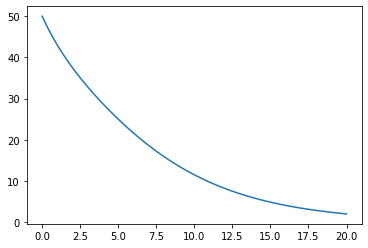

In [10]:
plt.plot(t, vx)

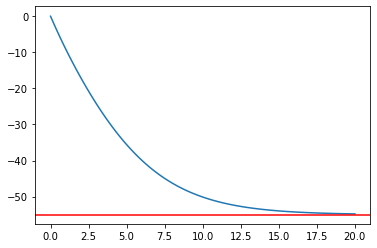

In [14]:
plt.plot(t, vy)
plt.axhline(vt, color='r')

How long until one reaches terminal velocity?

In [20]:
ind = np.abs(vy - vt)/np.abs(vt) < 0.01

In [21]:
t[ind]

array([17.17171717, 17.37373737, 17.57575758, 17.77777778, 17.97979798,
       18.18181818, 18.38383838, 18.58585859, 18.78787879, 18.98989899,
       19.19191919, 19.39393939, 19.5959596 , 19.7979798 , 20.        ])